# Physics-Informed Fitness

## Goal: Show how fitness functions can be customized to enforce problem-specific constraints.

### Pre-requisites

It is recommended to check out the [symbolic regression tutorial](tutorial_4.html) before continuing.

### Problem Description

A basic physics problem that benefits from using physics-informed fitness is modeling the velocity of an object falling through a viscous liquid. Here we'll model a the velocity of a ball falling through honey. Using Newton's 2nd law ($F = ma \to a = F/m$), we can derive that $a = g - cv/m$ where $g$ is the acceleration due to gravity, $c$ is a drag term, $v$ is the velocity of the ball, and $m$ is the mass of the ball. We can use this fact to enforce that the models Bingo produces for velocity are physically consistent.

**TODO free-body diagram showing problem, note that we are not factoring buoyancy here**

### Creating Training Data

We can integrate $a = g - cv/m$ to get the true equation of the ball's velocity as it falls through a fluid: $\frac{mg}{c} \left(1 - \exp \left(\frac{ct}{m}\right)\right)$. Note that while we can derive the true equation in this case, there are problems where we can't do so and only have training data. So, we will only be using this true equation to generate training data and use GPSR to get a model from the data.

Let's assume our ball has a mass of 1 $kg$ and a radius of 3 $cm$; on Earth $g$ is roughly 9.8 $m/s^2$; and for the ball dropping through honey, $c$ is roughly $1.8 \pi \, kg/s \approx 5.655 \, kg/s$ (Stokes' equation without velocity) at $\text{20}^{\circ}$C.

In [2]:
import numpy as np

m = 1
r = 3.0/100.0
g = 9.8
c = 5.655

t = np.linspace(0, 2, num=20)
v = m * g / c * (1 - np.exp(c * t / m))

True


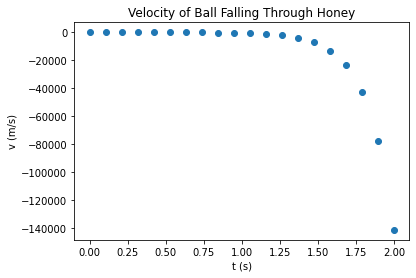

In [4]:
import matplotlib.pyplot as plt

plt.scatter(t, v)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.title("Velocity of Ball Falling Through Honey")
plt.show()